In [0]:
from google.colab import files
uploadedy = files.upload()


Saving ne_data_2_40.csv to ne_data_2_40.csv


In [0]:
from google.colab import files
uploadedx = files.upload()


Saving n_data_1_40.csv to n_data_1_40.csv


Iteration:  0 		Error:  2.322316151791685 	scale factor:  3.0
Iteration:  1 		Error:  0.31829084683826225 	scale factor:  0.3
Maximum number of iterations reached
Batch No.  0  of  8
Iteration:  0 		Error:  7.139473924796143 	scale factor:  3.0
Iteration:  1 		Error:  1.3754531339815503 	scale factor:  0.3
Maximum number of iterations reached
Batch No.  1  of  8
Iteration:  0 		Error:  2.8927077526099865 	scale factor:  3.0
Iteration:  1 		Error:  0.5454971064360812 	scale factor:  0.3
Maximum number of iterations reached
Batch No.  2  of  8
Iteration:  0 		Error:  2.543298751319194 	scale factor:  3.0
Iteration:  1 		Error:  0.39627731780475967 	scale factor:  0.3
Maximum number of iterations reached
Batch No.  3  of  8
Iteration:  0 		Error:  1.5920484115125222 	scale factor:  3.0
Iteration:  1 		Error:  0.16698054172135396 	scale factor:  0.3
Maximum number of iterations reached
Batch No.  4  of  8
Iteration:  0 		Error:  3.61720328892451 	scale factor:  3.0
Iteration:  1 		Error:  

ValueError: ignored

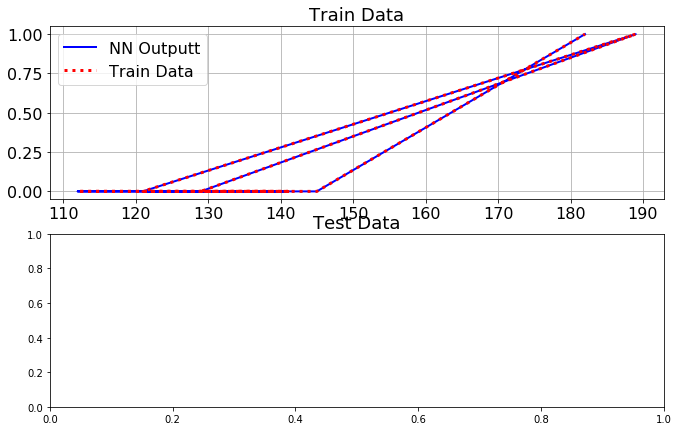

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
!pip install pyrenn
import pyrenn

# Importing the dataset
import io
datasetx = pd.read_csv(io.BytesIO(uploadedx['n_data_1_40.csv']), delimiter=',').T
datasety = pd.read_csv(io.BytesIO(uploadedy['ne_data_2_40.csv']), delimiter=',').T

#dataset = pd.read_csv('Churn_Modelling.csv')
X = datasety.iloc[:, 0:1].values
y = datasetx.iloc[:, 0:1].values

p_pred = [None] * 20
px_pred = [None] * 20

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state = 0)
np.reshape(X_train, (-1,1))
np.reshape(y_train, (-1,1))

# Make ANN
batch_size = 10

net = pyrenn.CreateNN([batch_size,10,10,10,10,10,10,batch_size],dIn=[0], dIntern = [1], dOut = [1,2])
number_of_batches=8

for i in range(number_of_batches):
    r = np.random.randint(0,len(X_train)-batch_size)

    Ptrain = X_train[r:r+batch_size,:]
    Ytrain = y_train[r:r+batch_size,:]
    
    #Train NN with training data Ptrain=input and Ytrain=target
    #Set maximum number of iterations k_max
    #Set termination condition for Error E_stop
    #The Training will stop after k_max iterations or when the Error <=E_stop
    net = pyrenn.train_LM(Ptrain,Ytrain,net,verbose=True,k_max=1,E_stop=1e-5)
    print('Batch No. ',i,' of ',number_of_batches)

prev = 0

for idx in (0,len(X_test)-batch_size):
  P_ = X_test[idx:idx+batch_size,:]
  y_pred = pyrenn.NNOut(P_,net)
  
  for i in range(len(y_pred)):
    if(y_pred[i] < 0.5):
      y_pred[i] = 0
    else:
      y_pred[i] = 1

  print("afterrrr y_pred: ", y_pred)
  print("afterrrr y_pred: ", y_test[idx:idx+batch_size])

  p_pred[idx:idx+batch_size] = y_pred
  px_pred[idx:idx+batch_size] = P_


  no_errors = (y_pred != y_test[idx:idx+batch_size])
  no_errors =  prev + no_errors.astype(int).sum()
  prev = no_errors
  idx = idx + batch_size
  
print("total no of errors: ", no_errors)
print("y_pred: ", y_pred)

accuracy = (len(y_test) - no_errors) /len(y_test)
print("Accuracy: %.2f%%" % (accuracy*100))
ber = no_errors / len(y_test)
print("BER:  %.2f%%" % (ber), " SNR: 10")
#correct = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_test, 1)) 
#accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
#print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

fig = plt.figure(figsize=(11,7))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
fs=18

#Train Data
ax0.set_title('Train Data',fontsize=fs)
ax0.plot(Ptrain,Ytrain,color='b',lw=2,label='NN Outputt')
ax0.plot(Ptrain,Ytrain,color='r',marker='None',linestyle=':',lw=3,markersize=8,label='Train Data')
ax0.tick_params(labelsize=fs-2)
ax0.legend(fontsize=fs-2,loc='upper left')
ax0.grid()

#Test Data
ax1.set_title('Test Data',fontsize=fs)
ax1.plot(px_pred,y_test,color='b',lw=2,label='NN Outputt')
ax1.plot(px_pred,p_pred,color='r',marker='None',linestyle=':',lw=3,markersize=8,label='Test Data')
ax1.tick_params(labelsize=fs-2)
ax1.legend(fontsize=fs-2,loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()
